In [7]:
import requests 
import json
from pprint import pprint
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts
import gmaps
from scipy.stats import sem
from scipy.stats import linregress
from config import Q1api_key
from config import Q1_GKey

In [8]:
# # Import Merged GDP and Weather data
merge_path = os.path.join("Resources", "Merge_data_2005-2015.csv")
merge_df = pd.read_csv(merge_path)

merge_df.head()

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP,GDP_md,GDP_bd
0,0,AFG,Afghanistan,2005,56.087945,29.609967,6.209138e+09,6209.137625,6.209138
1,1,AFG,Afghanistan,2006,57.501470,27.120458,6.971286e+09,6971.285595,6.971286
2,2,AFG,Afghanistan,2007,56.320054,25.329681,9.747880e+09,9747.879532,9.747880
3,3,AFG,Afghanistan,2008,56.755070,21.505365,1.010923e+10,10109.225814,10.109226
4,4,AFG,Afghanistan,2009,56.807912,31.106477,1.243909e+10,12439.087077,12.439087


In [9]:
# # Understand the data
max_Temp = merge_df['Temp_Farenheit'].max()
min_Temp = merge_df['Temp_Farenheit'].min()
print(f"Maximum temperature in data is {max_Temp}")
print(f"Minimum temperature in data is {min_Temp}")

max_GDP = merge_df['GDP_bd'].max()
min_GDP = merge_df['GDP_bd'].min()
print(f"Maximum temperature in data is {max_GDP}")
print(f"Minimum temperature in data is {min_GDP}")

Maximum temperature in data is 85.173935
Minimum temperature in data is 0.8050399999999988
Maximum temperature in data is 18219.3
Minimum temperature in data is 0.02183909889


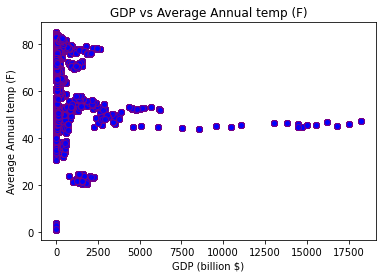

In [10]:
# # Plot all the data
# Plot the Temperature versus GDP data to look for trend/features to investigate
ListofISO34Plot = merge_df['ISO3']
for ISO in ListofISO34Plot:
    TemporaryScatterPlot_df = merge_df.loc[merge_df['ISO3']== ISO]
    TempCorrList = []
    TempCorrDict = {}

    GDP_plot = TemporaryScatterPlot_df['GDP_bd']
    Temps = TemporaryScatterPlot_df['Temp_Farenheit']
    Yrs = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

    
    plt.scatter(x=GDP_plot, y=Temps, marker='o', facecolor='b', edgecolors='purple', alpha = 0.75)
    plt.title(f"GDP vs Average Annual temp (F)")
    plt.xlabel("GDP (billion $)")
    plt.ylabel("Average Annual temp (F)")
#     plt.figure(figsize=(15,5))
    plt.savefig("output_data/Q1/Fig1x_AvTemp_vs_GDP_AllCountries.png")


In [11]:
# Crop data to area of interest
zone1_df = merge_df.loc[(merge_df['Temp_Farenheit']>=40) & (merge_df['Temp_Farenheit']<=60)]
zone1_df

zone2_df = merge_df.loc[(merge_df['Temp_Farenheit']>=70) & (merge_df['Temp_Farenheit']<=86)]
zone2_df

zone3_df = merge_df.loc[(merge_df['Temp_Farenheit']>=18) & (merge_df['Temp_Farenheit']<=28)]
zone3_df

# Create a merged (zone1, 2 & 3) dataframe
ZONE_df = merge_df.loc[(merge_df['Temp_Farenheit']>=18) & (merge_df['Temp_Farenheit']<=28) | (merge_df['Temp_Farenheit']>=40) & (merge_df['Temp_Farenheit']<=60) | (merge_df['Temp_Farenheit']>=70) & (merge_df['Temp_Farenheit']<=86)]
ZONE_df = zone1_2_df.dropna(how='any')


# # Understand the data
ZoneCountries = Regress_df['ISO3'].nunique()
print(f"No. of countries after filter {ZoneCountries}")

ZONE_df

NameError: name 'zone1_2_df' is not defined

In [ ]:
# # Looking for Regressions
# Looking at the trend line for temperature over time (10yrs) for each country and GDP over time for 
# the same country storing these values to compare them.

# FOR COMBINED ZONES OF INTEREST
ListofISO3_Merged = ZONE_df['ISO3']
ZONERegressList = []
ZONERegressDictGDP = {}
ZONERegressDictTemp = {}
R_ValuesGDP = {}
R_ValuesTemp = {}

# Run for loop to get regression values for GDP for each country
for ISO in ListofISO3_Merged:
    ZONECorrelation_df = ZONE_df.loc[ZONE_df['ISO3']== ISO]
    GDP = ZONECorrelation_df['GDP']
    Temps = ZONECorrelation_df['Temp_Farenheit']
    Yrs = ZONECorrelation_df['Year']    

    #  LINEAR REGRESSION MODEL 
    # Run the regression and store each of the returned values
    slope, intercept, rvalue, pvalue, stderr = linregress(Yrs, GDP)
    Zone_regression = [slope, intercept, rvalue, pvalue, stderr]
    Zone_Rvalue = Zone_regression[2]
    ZONERegressDictGDP[ISO] = Zone_Rvalue
R_ValuesGDP = ZONERegressDictGDP

# Run for loop to get regression values for annual average Temperature for each country
for ISO in ListofISO3_Merged:
    ZONECorrelation_df = ZONE_df.loc[ZONE_df['ISO3']== ISO]
    GDP = ZONECorrelation_df['GDP']
    Temps = ZONECorrelation_df['Temp_Farenheit']
    Yrs = ZONECorrelation_df['Year']    

    #  LINEAR REGRESSION MODEL 
    # Run the regression and store each of the returned values
    slope, intercept, rvalue, pvalue, stderr = linregress(Yrs, Temps)
    Zone_regression = [slope, intercept, rvalue, pvalue, stderr]
    Zone_Rvalue = Zone_regression[2]
    ZONERegressDictTemp[ISO] = Zone_Rvalue
R_ValuesTemp = ZONERegressDictTemp


In [ ]:
# # Comparing GDP and Temperature regressions
# Looking at the difference between the r-value for the GDP trend line and the annual temperature of a given 
# country would help ascertain any relationship.
# For example, a high, positive r-value for the GDP trend line and a smiliar high, positive r-value for the 
# annual temperature trend line indicates the possibility of a correlation.

# # Understand the data
maxTempRegression = Regress_df['TEMP_REGRESS'].max()
minTempRegression = Regress_df['TEMP_REGRESS'].min()
print(f"Maximum temperature in data is {maxTempRegression}")
print(f"Minimum temperature in data is {minTempRegression}")

maxGDPRegression = Regress_df['GDP_REGRESS'].max()
minGDPRegression = Regress_df['GDP_REGRESS'].min()
print(f"Maximum temperature in data is {maxGDPRegression}")
print(f"Minimum temperature in data is {minGDPRegression}")


# Create a df to look at the GDP and Temperature regressions
RegressList ={"TEMP_REGRESS": R_ValuesTemp_z12,"GDP_REGRESS": R_ValuesGDP_z12}
Regress_df = pd.DataFrame(RegressList)
Regress_df = Regress_df.reset_index()
Regress_df = Regress_df.rename(columns={'index': 'ISO3'})
Regress_df['Regression_diff'] = Regress_df['TEMP_REGRESS'] - Regress_df['GDP_REGRESS']
Regress_df = Regress_df.sort_values(by='Regression_diff', ascending=True)
Regress_df

In [ ]:
# # Dual axis bar/line chart
# A bar chart/ line graph to compare GDP and annual temperature trends over time.
# Make a ISO List based on findings from regress data frame
RegressList = ['TJK', 'BGD', 'WSM', 'TUV', 'BTN', 'UGA', 'GRC', 'AND', 'ITA', 'MNP', 'HRV', 'ESP', 'ALB', 'BIH', 'MNE', 'ROU', 'CZE', 'AUT']
for ISO in RegressList:
    BarGraph_df = zone1_2_df.loc[zone1_2_df['ISO3']== ISO]
    yearList = BarGraph_df['Year'].unique()
    yearNo = np.array(range(len(yearList)))
    GDPNos = BarGraph_df['GDP_bd']
    TempNos = BarGraph_df['Temp_Farenheit']
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    ax.bar(yearList, GDPNos, color=(63/255,79/255,232/255,0.7), label='GDP_bd')
    ax2.plot(yearList, TempNos, color='red', label='Temp(F)')
    ax.set_xticklabels(yearList)
    ax.legend(loc='best')
    ax.set_title(f"GDP bars and Average Annual temperature (F) Line Graph_{ISO}")
    ax.set_ylabel('GDP (bil,$)')
    ax2.set_ylabel('Temperature(F)')
    ax.set_xlabel('Time (Yr.)')
    plt.savefig(f"output_data/Q1/Fig2_GDP_BarChart_TempLineChart_{ISO}_2005-2015.png")


In [ ]:
# Lat long of capital cities of correlated countries
# CorrCountriesList = []
BGD = (23.763889, 90.388889)
TUV = (-8.516667, 179.2)
AND = (42.5, 1.516667)
MNP = (15.19, 145.74)
ALB = (41.316667, 19.816667)
ROU = (44.416667, 26.1)

CorrCountriesList = [BGD,TUV, AND, MNP, ALB, ROU]

In [ ]:
# CREATE A GEOXXXX MAP
# STEP 1 ---------------------------------------------------------
# SET UP LAT LONG PAIRS
Coords = CorrCountriesList
Coords

fig = gmaps.figure()

# Create a marker layer using our coordinates
markers = gmaps.marker_layer(Coords)

# Add the layer to the map
fig.add_layer(markers)

# display the figure with the newly added layer
fig

